<a href="https://colab.research.google.com/github/manasdeshpande/DAV_Lab/blob/main/Exp3/DAV_EXP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.kaggle.com/datasets/ishaanthareja007/company-sales

**Aim:**Multiple Linear Regression in Python and R

**Lab Outcomes (LO)**:
Implement various Regression techniques for prediction. (LO2)

**Tools and Libraries**:Python Libraries: scikit-learn, matplotlib, numpy, pandas

R Libraries: lm, ggplot2, dplyr, broom, ggubr

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/company.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
inputs = df.iloc[:,:-1]
inputs

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
target = df.iloc[:,-1:]
target

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


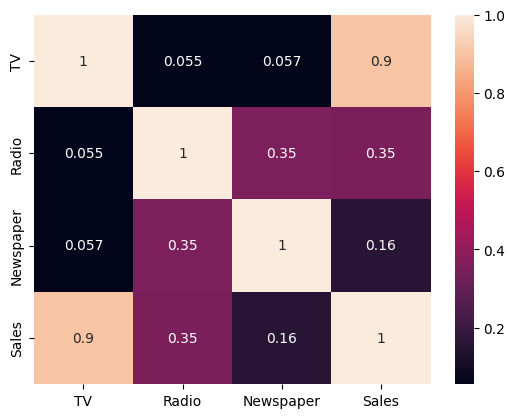

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

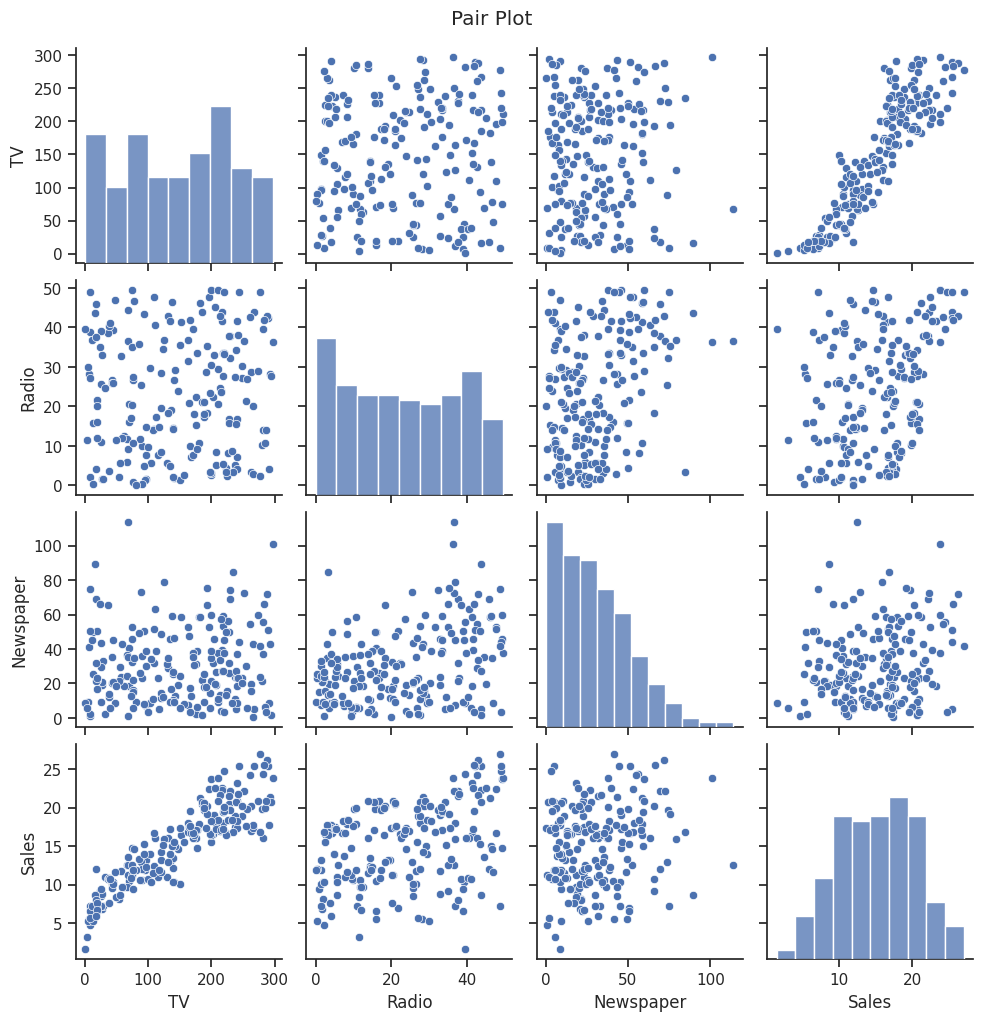

In [ ]:
sns.set(style="ticks", color_codes=True)
pair_plot = sns.pairplot(df)
plt.suptitle('Pair Plot',y=1.02)
plt.show()

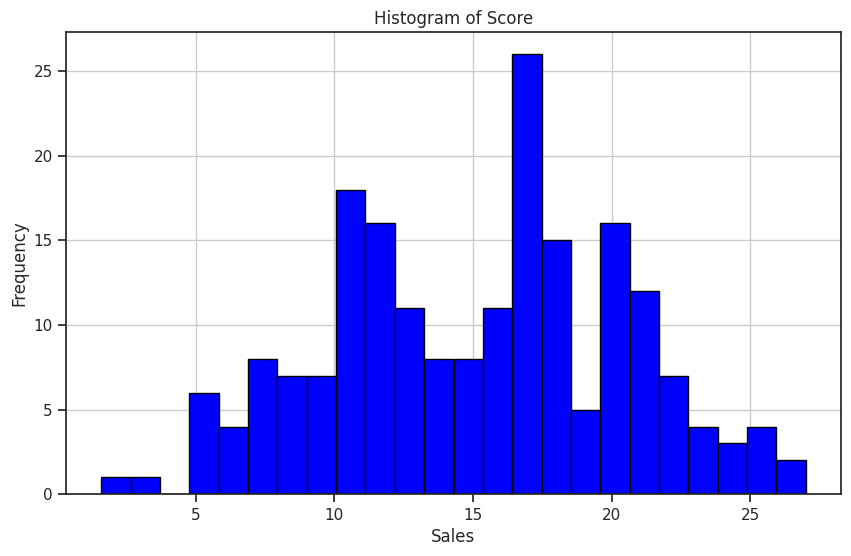

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Sales'], bins=24, color='blue', edgecolor='black')
plt.title('Histogram of Score')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160, 1)
(40, 1)


In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
import pandas as pd
import numpy as np

n = x_train.shape[0]
k = x_train.shape[1]

# Print column names and coefficients
print(x_train.columns)
print(lm.coef_)

# Reshape coefficients to a 2D array with 1 column
coef_data = lm.coef_.reshape(-1, 1)
print(coef_data)

# Create DataFrame with coefficients
cdf = pd.DataFrame(data=coef_data, index=x_train.columns, columns=["Coefficients"])

# Calculate standard error
dfN = n - k
train_pred = lm.predict(x_train)
train_error = np.square(train_pred - y_train)
sum_error = np.sum(train_error)
se = [0] * k

for i in range(k):
    r = (sum_error / dfN)
    r = r / np.sum(np.square(x_train[x_train.columns[i]] - x_train[x_train.columns[i]].mean()))
    se[i] = np.sqrt(r)

# Convert coefficients and standard errors to float64
cdf['Coefficients'] = cdf['Coefficients'].astype('float64')
se = np.array(se).astype('float64')

# Add standard error column to DataFrame
cdf['Standard Error'] = se

# Calculate t-statistic
cdf['t-statistic'] = cdf['Coefficients'] / cdf['Standard Error']

# Display the updated DataFrame
cdf


Index(['TV', 'Radio', 'Newspaper'], dtype='object')
[[ 0.05507865  0.10308563 -0.00090115]]
[[ 0.05507865]
 [ 0.10308563]
 [-0.00090115]]


,Coefficients,Standard Error,t-statistic
TV,0.055079,0.001526,36.098097
Radio,0.103086,0.008775,11.747804
Newspaper,-0.000901,0.006343,-0.142063


We are taking TV and Newspaper as our two coefficients

In [ ]:
x_train = x_train.drop(columns='Newspaper')
x_test = x_test.drop(columns='Newspaper')

In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
x_train_pred = lm.predict(x_train)
r2_score(y_train, x_train_pred)

0.905476269615609

In [ ]:
x_test_pred = lm.predict(x_test)

r2_score(y_test, x_test_pred)

0.8749222345136187

In [ ]:

x_1 = np.reshape(x_test.iloc[:, 0].to_numpy(), (len(x_test), 1))
x_2 = np.reshape(x_test.iloc[:, 1].to_numpy(), (len(x_test), 1))
y_ = np.reshape(y_test.to_numpy(), (len(y_test), 1))
y_p = np.reshape(x_test_pred, (len(x_test_pred), 1))

df1 = pd.DataFrame({"X1": x_1.flatten(), "X2": x_2.flatten(), "Actual": y_.flatten(), "Predict": y_p.flatten()})

df1

,X1,X2,Actual,Predict
0,210.8,49.6,23.8,21.320219
1,202.5,22.3,16.6,18.062816
2,95.7,1.4,11.9,10.037574
3,280.2,10.1,19.8,21.090270
4,253.8,21.3,17.6,20.785294
5,283.6,42.0,25.5,24.549685
6,163.3,31.6,16.9,16.858058
7,180.8,10.8,17.9,15.688186
8,70.6,16.0,10.5,10.152947
9,215.4,23.6,17.1,18.906558


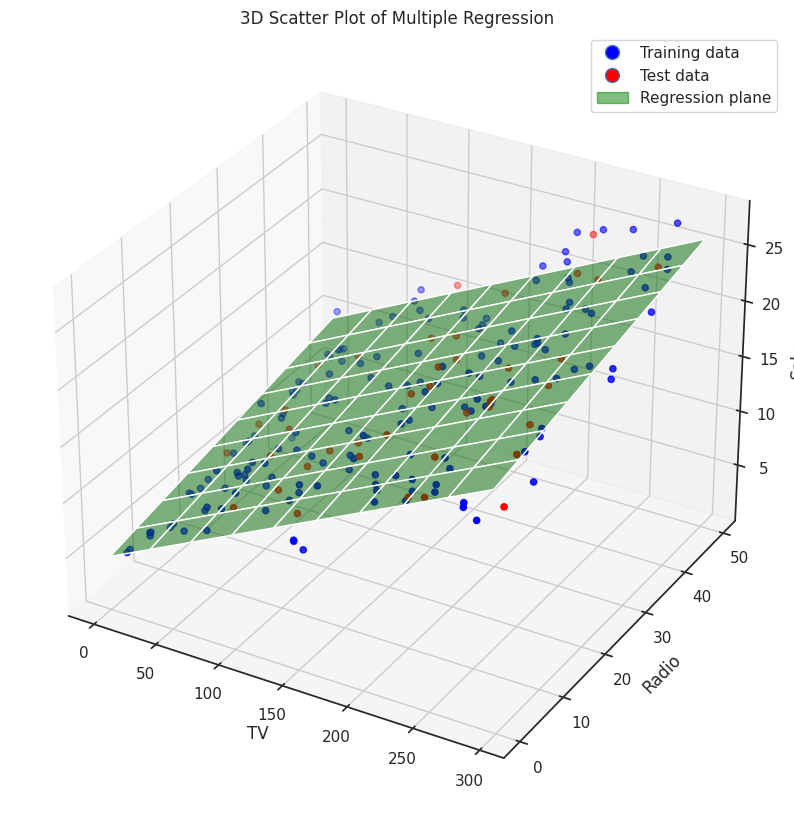

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_train["TV"], x_train["Radio"], y_train, color='blue', label='Training data')
ax.scatter(x_test["TV"], x_test["Radio"], y_test, color='red', label='Test data')

xx, yy = np.meshgrid(np.linspace(x_train["TV"].min(), x_train["TV"].max(), 10),
                     np.linspace(x_train["Radio"].min(), x_train["Radio"].max(), 10))
zz = lm.intercept_ + lm.coef_[0,0] * xx + lm.coef_[0,1] * yy

ax.plot_surface(xx, yy, zz, alpha=0.5, color='green', label='Regression plane')

training_legend = Line2D([0], [0], linestyle="none", marker="o", markersize=10, markerfacecolor="blue", label='Training data')
test_legend = Line2D([0], [0], linestyle="none", marker="o", markersize=10, markerfacecolor="red", label='Test data')
regression_plane_legend = Patch(color='green', alpha=0.5, label='Regression plane')

ax.legend(handles=[training_legend, test_legend, regression_plane_legend], loc='best')

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.set_title('3D Scatter Plot of Multiple Regression')

plt.show()

In [ ]:
from sklearn import metrics
print("Explaind variance:", metrics.explained_variance_score(y_test,x_test_pred))
print("Max error:",metrics.max_error(y_test,x_test_pred))
print("Mean absolute error:",metrics.mean_absolute_error(y_test,x_test_pred))
print("Mean squared error:",metrics.mean_squared_error(y_test,x_test_pred))
print("R-2 score:",metrics.r2_score(y_test,x_test_pred))

Explaind variance: 0.875598337147417
Max error: 3.539752889771478
Mean absolute error: 1.2715087162436318
Mean squared error: 2.4054948040980504
R-2 score: 0.8749222345136187


In [ ]:
print("Co-efficients of the regression")
print(f'B1:{lm.coef_[0,0]} B2:{lm.coef_[0,1]} B0:{lm.intercept_[0]}')
print("Equation of line")
print(f'Y={lm.coef_[0,0]:.2f}*X1 +{lm.coef_[0,1]:.2f}*X2 + {lm.intercept_[0]:.2f}')

Co-efficients of the regression
B1:0.055069285484687 B2:0.1025761481662893 B0:4.623837112617823
Equation of line
Y=0.06*X1 +0.10*X2 + 4.62


R Programming

In [1]:
install.packages("caret")
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(caret)
library(corrplot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


corrplot 0.92 loaded



In [3]:
Data <- read.csv("/content/company.csv")

In [4]:
x.cor=cor(Data)
x.cor

,TV,Radio,Newspaper,Sales
TV,1.00000000,0.05480866,0.05664787,0.9012079
Radio,0.05480866,1.00000000,0.35410375,0.3496311
Newspaper,0.05664787,0.35410375,1.00000000,0.1579600
Sales,0.90120791,0.34963110,0.15796003,1.0000000


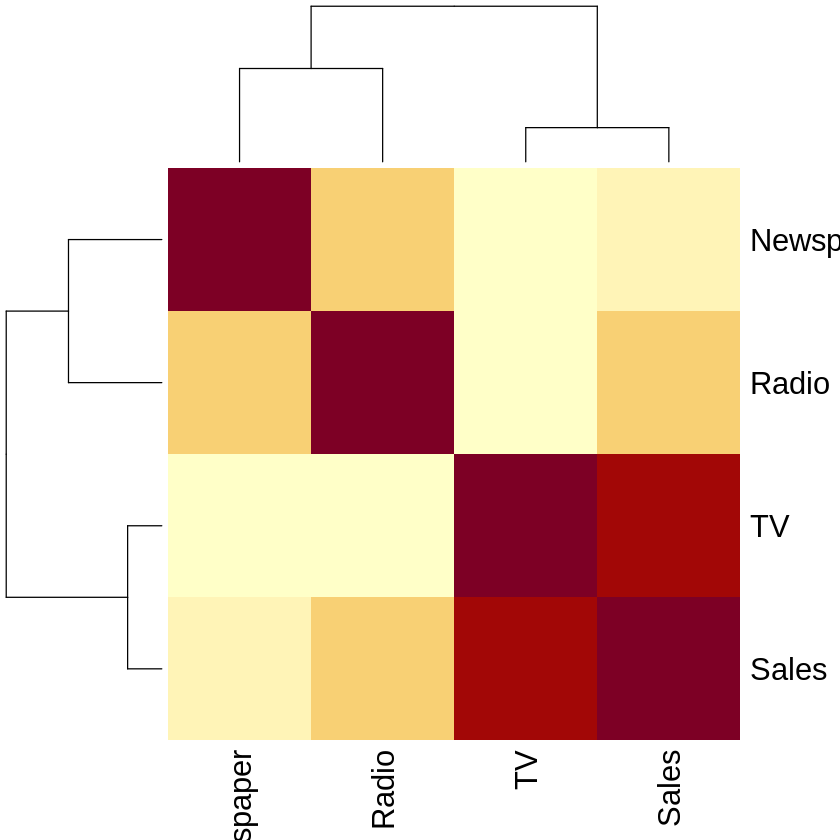

In [5]:
heatmap(x = x.cor, symm = TRUE)

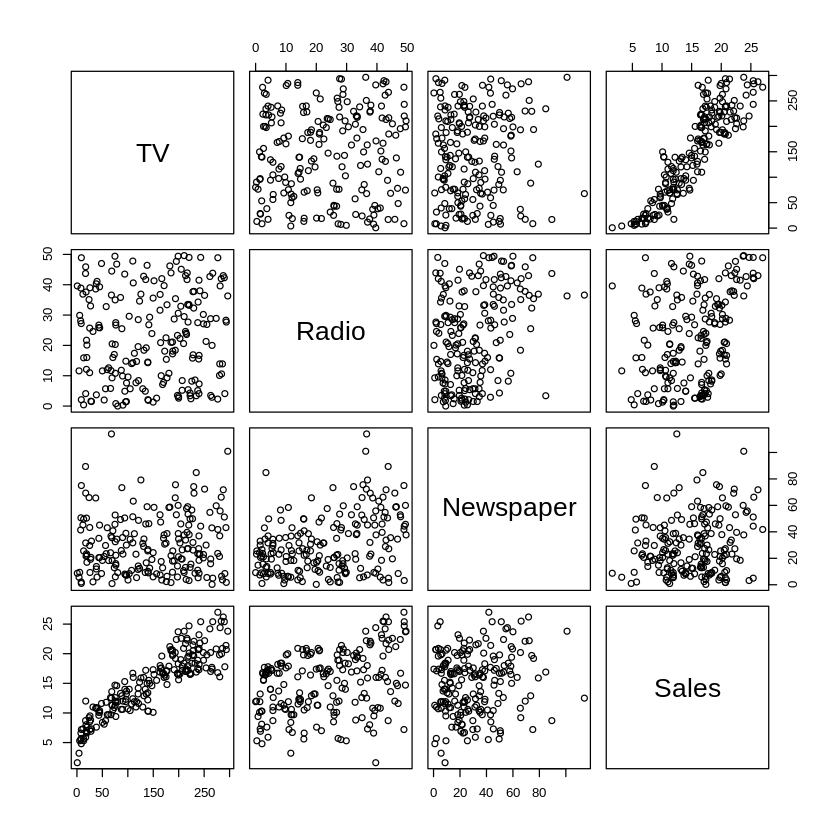

In [6]:
pairs(Data)

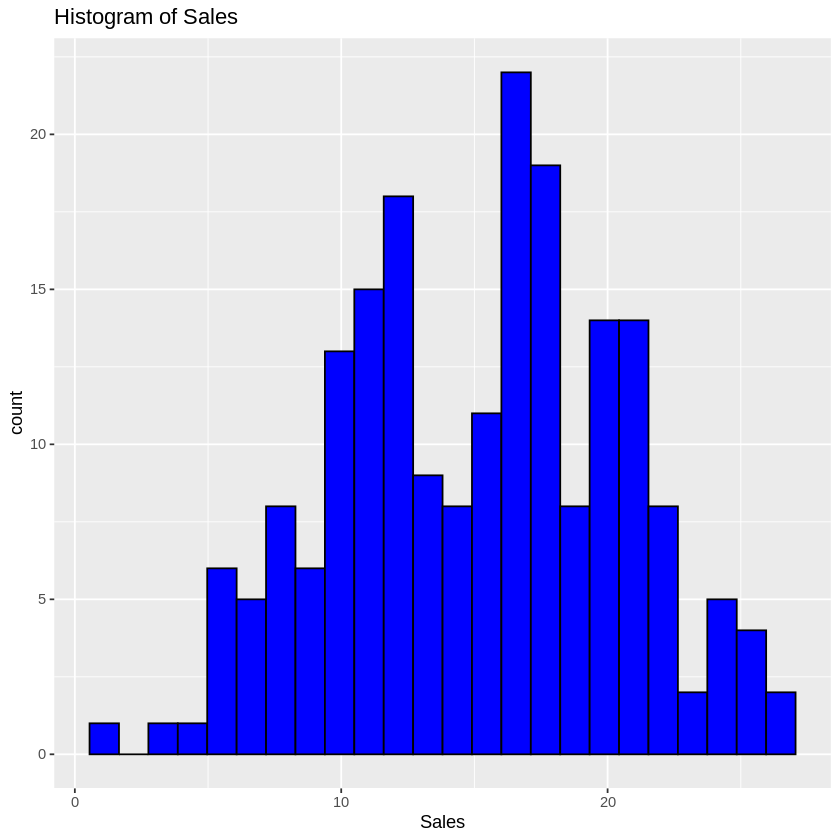

In [7]:
hist_plot <- ggplot(Data, aes(x = Sales)) +
  geom_histogram(color = "black", fill = "blue", bins = 24) +
  labs(title = "Histogram of Sales")
print(hist_plot)

In [16]:
set.seed(42)
train_index <- createDataPartition(Data$Sales, p = 0.75, list = FALSE)
x_train <- subset(Data, rownames(Data) %in% train_index, select = c("Sales", "TV", "Radio"))
x_test <- subset(Data, !(rownames(Data) %in% train_index), select = c("Sales", "TV", "Radio"))


In [17]:
model <- lm(Sales ~ ., data =x_train)
summary(model)


Call:
lm(formula = Sales ~ ., data = x_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5858 -0.7460  0.0304  0.8881  3.6648 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.840145   0.340909   14.20   <2e-16 ***
TV          0.052675   0.001628   32.36   <2e-16 ***
Radio       0.108807   0.009584   11.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.697 on 148 degrees of freedom
Multiple R-squared:  0.8942,	Adjusted R-squared:  0.8928 
F-statistic: 625.4 on 2 and 148 DF,  p-value: < 2.2e-16


In [18]:
x_train <- x_train["TV","Radio"]
x_test <- x_test["TV","Radio"]
y_train <- x_train["Sales"]
y_test <- x_test["Sales"]


In [21]:
x_test <- data.frame(TV = x_test["TV"],Radio=x_test["Radio"])

In [22]:
y_predict <- predict(model, newdata = x_test)

In [26]:
install.packages('plot3D')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



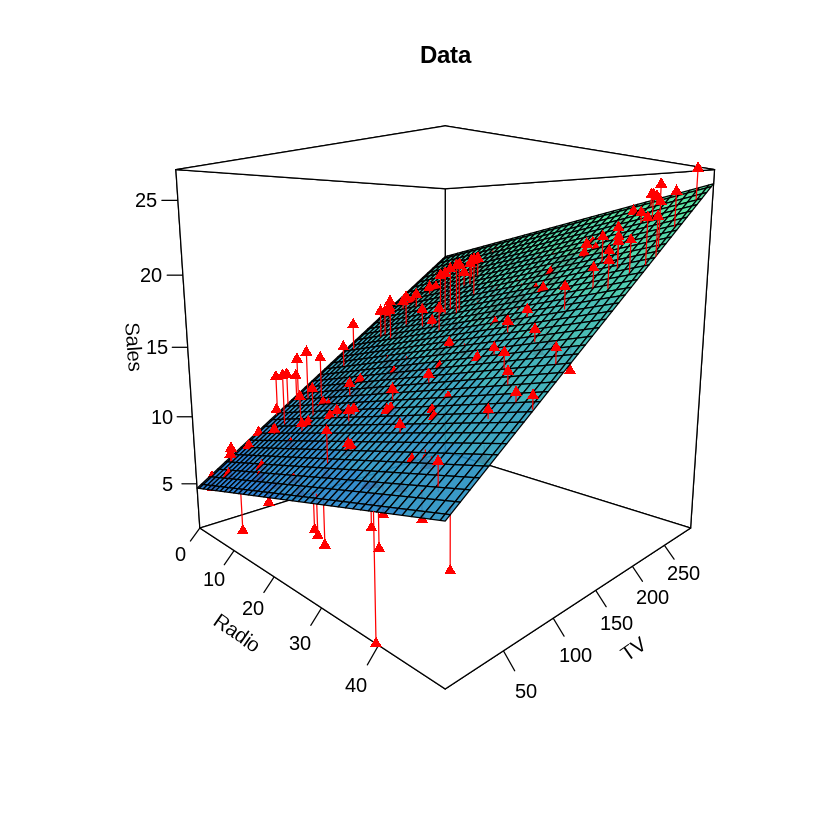

In [56]:
library("plot3D")

# set the x, y, and z variables
x <- Data$Radio
y <- Data$TV
z <- Data$Sales

# Compute the linear regression
fit <- lm(z ~ x + y)

# create a grid from the x and y values (min to max) and predict values for every point
# this will become the regression plane
grid.lines = 40
x.pred <- seq(min(x), max(x), length.out = grid.lines)
y.pred <- seq(min(y), max(y), length.out = grid.lines)
xy <- expand.grid( x = x.pred, y = y.pred)
z.pred <- matrix(predict(fit, newdata = xy),
                 nrow = grid.lines, ncol = grid.lines)

# create the fitted points for droplines to the surface
fitpoints <- predict(fit)

scatter3D(x, y, z, pch = 17, col="red",
          theta = 45, phi = 0,
          ticktype = "detailed",
          xlab = "Radio", ylab = "TV", zlab = "Sales",
          surf = list(x = x.pred, y = y.pred, z = z.pred,
                      facets = TRUE, fit = fitpoints, col=ramp.col (col = c("dodgerblue3","seagreen2")
                      , n = 10, alpha=0.9),border="black"), main = "Data")

**Conclusion-**
<br>
Successfully performed multiple linear regression on company Sales Dataset where line equation is
<br>
Y=0.06*X1 +0.10*X2 + 4.62
<br>
X1 is coefficient of TV and
<br>
X2 is coefficient of Radio